In [1]:
using Pkg
Pkg.activate(".")
using Plots

  Activating project at `~/Research/SurrogateDistanceModels/notebooks`


In [2]:
struct LogisticFunction
    scale::Float64
end

@inline logistic(lfun::LogisticFunction, x) = 1 / (1 + exp(-lfun.scale * x))

function smooth_topk(lfun::LogisticFunction, X::AbstractVector, t)
    s = 0.0
    @inbounds @simd for x in X
        s += logistic(lfun, x + t)
    end
    
    s
end

function binsearch_optim_topk(lfun::LogisticFunction, X, k::Float64; tol=1e-1, maxiters=64)
    low, high = -1e6, 1e6 # extrema(X)
    
    iter = 0
    t = 0.0
    
	while low < high
        t = 0.5 * (low + high)
        h = smooth_topk(lfun, X, t)
        # @show k, h, iter, t, low, high
        abs(k - h) <= tol && break
        if k < h
            high = t
        else
            low = t
        end
        
        iter += 1
        iter == maxiters && break
	end
	
    t
end

binsearch_optim_topk (generic function with 1 method)

In [3]:
X = rand(50);

In [4]:
lfun = LogisticFunction(12)
t = binsearch_optim_topk(lfun, X, 5.0)
smooth_topk(lfun, X, t)

5.013896365882694

In [10]:
L = logistic.((lfun,), X .+ t)
@show X
@show L
sum(L .> 0.35)

X = [0.8777835728499775, 0.5759032173283217, 0.7010002550573249, 0.9289030000082663, 0.6697693975290142, 0.362935915755914, 0.3850238751779884, 0.18731014624448894, 0.68120688204539, 0.7833381948477456, 0.585330852585712, 0.10648691692496348, 0.35713351075295874, 0.4439651251043615, 0.22339565871679468, 0.8302879156631442, 0.7928849756054525, 0.22733376430775631, 0.13674603432980892, 0.7507402814041615, 0.8603173586096496, 0.801699620506489, 0.1945931715353877, 0.5957001659290627, 0.8657618249801722, 0.7017522710136589, 0.1562747868913863, 0.5344880016483984, 0.8228313574592584, 0.8982580475346255, 0.8860926639873686, 0.18370503932511495, 0.07356688785704302, 0.8782450706066448, 0.4455176471400688, 0.3613344546605525, 0.7346078561335059, 0.010841427865423303, 0.45854354369162975, 0.663711089590718, 0.9043882595665946, 0.6684216784090976, 0.042573861977594496, 0.2630316699298011, 0.7622509929392142, 0.5867131179836921, 0.4817628864079536, 0.8474437397483154, 0.371137309471954, 0.1542834

6

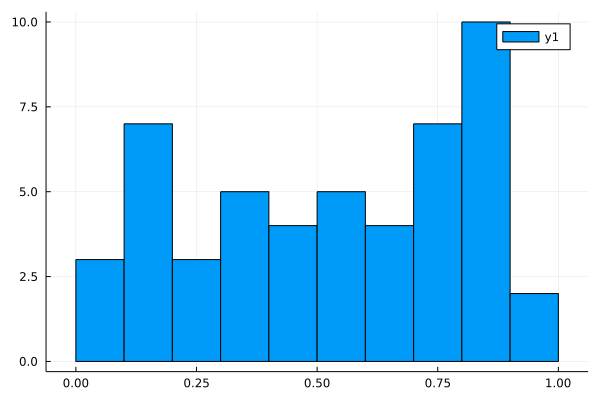

In [11]:
histogram(X, bins=10)

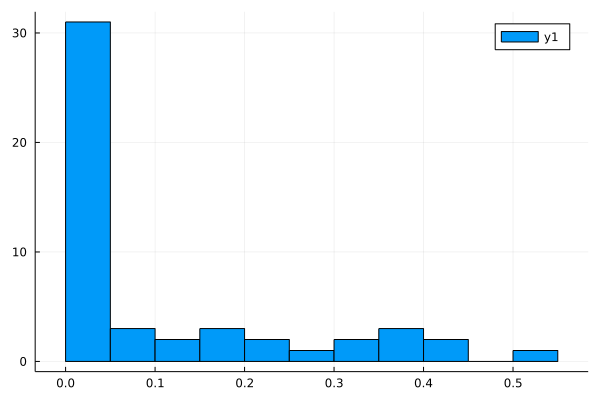

In [12]:
histogram(L, bins=10)